Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


data collection and processing



In [ ]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and column
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting the statictical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:     
1-positive correlation - directly proportioanl between two data sets   
2-negative correlationn - inversly proportioanl between two data sets


In [ ]:
print(gold_data.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [ ]:
numeric_data = gold_data.select_dtypes(include = [float])
correlation = numeric_data.corr()

<Axes: >

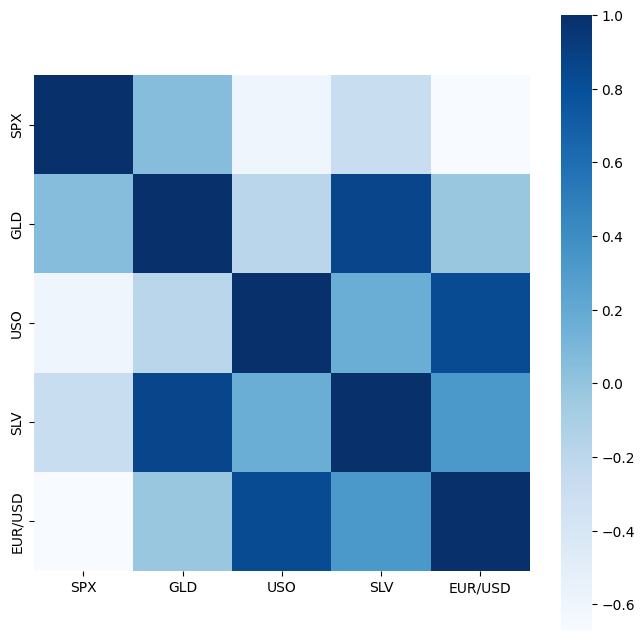

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f', annot_kws = {'size':8}, cmap = 'Blues')


In [ ]:
#correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


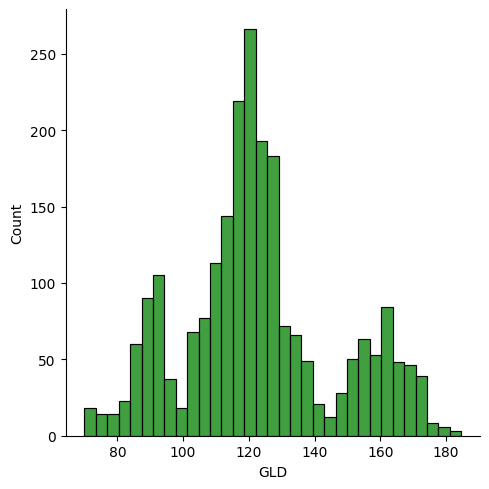

In [ ]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color = 'green')

splitting the features and Target

In [ ]:
X = numeric_data.drop(['GLD'],axis = 1)
Y = numeric_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data (80%) and test data (20%)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model training:
Random forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)


In [ ]:
#training the model
regressor.fit(X_train,Y_train)
print("Model training completed")

Model training completed


Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.3555991   82.12719976 116.11690014 127.6315002  120.82970115
 154.70969752 150.24909801 125.96080026 117.60889859 126.05030045
 116.53540122 172.13710098 142.2377991  167.68549802 115.07289981
 117.57300045 138.3760036  169.88790076 159.16170265 158.23789937
 155.08909983 125.0207004  176.50569905 157.02730351 125.29400023
  93.92939978  77.54540004 120.52240022 119.05149948 167.45959988
  88.22730068 125.3743001   91.17860051 117.76209993 121.12729909
 136.43860141 115.45510113 115.30510087 148.22199858 107.34430108
 104.54990246  87.09659784 126.35030108 117.83319997 152.40869922
 119.67259987 108.35389982 108.20019801  93.18070071 127.09259766
  75.01220024 113.62959929 121.36739989 111.22539902 118.89519875
 120.40039995 159.67840035 166.89110124 146.89049694  85.81529839
  94.47270029  86.81809836  90.47580022 118.95030058 126.41350082
 127.55230016 169.00289998 122.26659935 117.27699866  98.37910011
 167.02610161 143.10959843 132.09110222 121.09920242 120.29469937
 119.64640

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889686280892087


comparing the acual values and predicted values in plot

In [ ]:
Y_test = list(Y_test)

Text(0, 0.5, 'GLD Price')

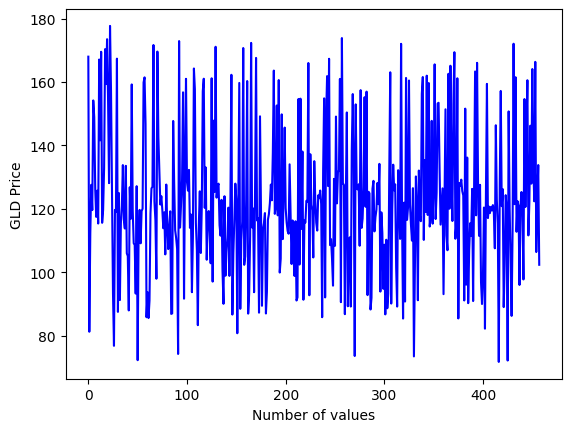

In [ ]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

Text(0, 0.5, 'GLD Price')

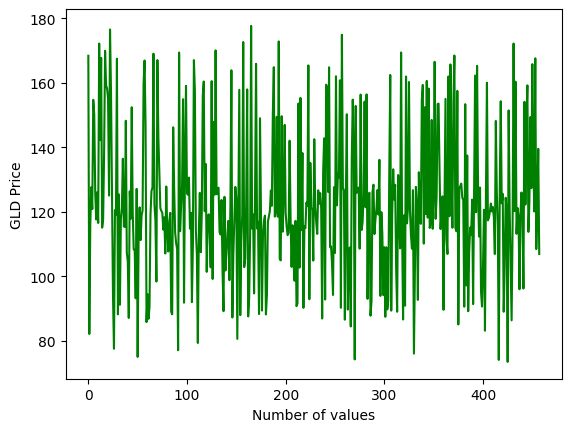

In [ ]:
plt.plot(test_data_prediction, color = 'green', label = 'predicted value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

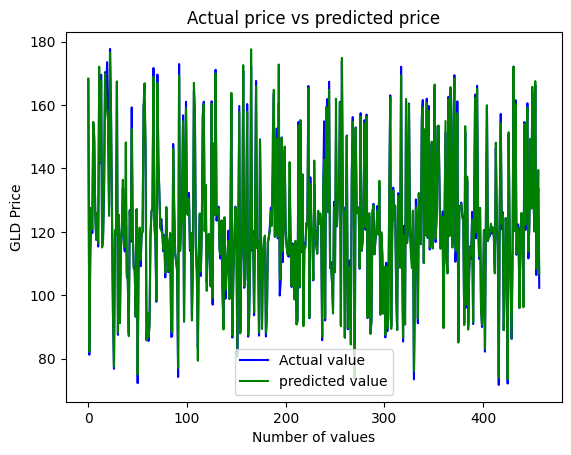

In [ ]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()